In [1]:
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves
import logging
import shutil
import os
import glob
import yaml
from collections import namedtuple
from pprint import pprint

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:

# # Multiple Model Training Example
# 
# This example trains multiple models and extracts training statistics


In [20]:
def clean_results():
    try:
        shutil.rmtree('./results')
    except:
        pass

    try:
        shutil.rmtree('./visualizations')
    except:
        pass

    try:
        file_list = glob.glob('./data/*.json')
        file_list = file_list + (glob.glob('./data/*.hdf5'))
        for file_ in file_list:
            os.remove(file_)
    except:
        pass

In [21]:
## Clean up old results folder
clean_results()

In [22]:
# read in base model definition
with open('./model_definition.yaml', 'r') as f:
    base_model = yaml.safe_load(f.read())



In [ ]:
pprint(base_model)

In [23]:
# Specify named tuple to keep track of training results
TrainingResult = namedtuple('TrainingResult', ['name', 'train_stats'])

# specify alternative architectures to test
FullyConnectedLayers = namedtuple('FullyConnectedLayers',['name', 'fc_layers'])

list_of_fc_layers = [
    FullyConnectedLayers(name='Option1', fc_layers=[{'fc_size':64, 'dropout': 'true'}]),

    FullyConnectedLayers(name='Option2', fc_layers=[{'fc_size':128, 'dropout':'true'},
                                                    {'fc_size':64, 'dropout': 'true'}]),

    FullyConnectedLayers(name='Option3', fc_layers=[{'fc_size':128, 'dropout':'true'}])
]

list_of_train_stats = []


In [24]:
# ## Train models
for model_option in list_of_fc_layers:
    print('>>>> training: ', model_option.name)

    # set up Python dictionary to hold model training parameters
    model_definition = base_model.copy()
    model_definition['input_features'][0]['fc_layers'] = model_option.fc_layers
    model_definition['training']['epochs'] = 8

    # Define Ludwig model object that drive model training
    model = LudwigModel(model_definition,
                        logging_level=logging.INFO)

    # initiate model training
    train_stats = model.train(data_csv='./data/mnist_dataset_training.csv',
                             experiment_name='multiple_experiment',
                             model_name=model_option.name)

    # save training stats for later use
    list_of_train_stats.append(TrainingResult(name=model_option.name, train_stats=train_stats))

    print('>>>>>>> completed: ', model_option.name, '\n')

    model.close()

>>>> training:  Option1
Experiment name: multiple_experiment
Model name: Option1
Output path: results/multiple_experiment_Option1


ludwig_version: '0.2.1'
command: ('/opt/anaconda/envs/wmlce/lib/python3.7/site-packages/ipykernel_launcher.py '
 '-f '
 '/root/.local/share/jupyter/runtime/kernel-674836de-0bba-4c9c-87f1-fe9ae52d0055.json')
commit_hash: '3cbd9aa5fd1d'
random_seed: 42
input_data: './data/mnist_dataset_training.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'conv_layers': [   {   'filter_size': 3,
                                                     'num_filters': 32,
                                                     'pool_size': 2,
                                                     'pool_stride': 2},
                                                 {   'dropout': True,
                                                     'filter_size': 3,
                                                     'num_filters': 64,
                  



Using full raw csv, no hdf5 and json file with the same name have been found
Building dataset (it may take a while)
Using 4 processes for preprocessing images
Writing dataset
Writing train set metadata with vocabulary
Training set: 42118
Validation set: 5943
Test set: 11939
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `layer.__call__` method instead.


╒══════════╕
│ TRAINING │
╘══════════╛



Epoch 1
Evaluation test : 100%|██████████| 94/94 [00:00<00:00, 489.73it/s]
Took 4.8390s
╒═════════╤════════╤════════════╤═════════════╕
│ label   │   loss │   accuracy │   hits_at_k │
╞═════════╪════════╪════════════╪═════════════╡
│ train   │ 2.3725 │     0.1165 │      0.3144 │
├─────────┼────────┼────────────┼─────────────┤
│ vali    │ 2.3789 │     0.1112 │      0.3020 │
├─────────┼────────┼────────────┼─────────────┤
│ test    │ 2.3696 │     0.1159 │      0.3097 │
╘═════════╧════════╧════════════╧═════════════╛
Validation loss on combined

random_seed: 42
input_data: './data/mnist_dataset_training.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'conv_layers': [   {   'filter_size': 3,
                                                     'num_filters': 32,
                                                     'pool_size': 2,
                                                     'pool_stride': 2},
                                                 {   'dropout': True,
                                                     'filter_size': 3,
                                                     'num_filters': 64,
                                                     'pool_size': 2,
                                                     'pool_stride': 2}],
                              'encoder': 'stacked_cnn',
                              'fc_layers': [   {   'dropout': 'true',
                                                   'fc_size': 128},
                                               { 



Found hdf5 and json with the same filename of the csv, using them instead
Using full hdf5 and json
Loading data from: ./data/mnist_dataset_training.hdf5
Loading metadata from: ./data/mnist_dataset_training.json
Training set: 42118
Validation set: 5943
Test set: 11939

╒══════════╕
│ TRAINING │
╘══════════╛


Epoch 1
Evaluation test : 100%|██████████| 94/94 [00:00<00:00, 523.44it/s]
Took 2.8133s
╒═════════╤════════╤════════════╤═════════════╕
│ label   │   loss │   accuracy │   hits_at_k │
╞═════════╪════════╪════════════╪═════════════╡
│ train   │ 2.3862 │     0.1000 │      0.2976 │
├─────────┼────────┼────────────┼─────────────┤
│ vali    │ 2.3913 │     0.0983 │      0.2965 │
├─────────┼────────┼────────────┼─────────────┤
│ test    │ 2.3881 │     0.1014 │      0.2944 │
╘═════════╧════════╧════════════╧═════════════╛
Validation loss on combined improved, model saved


Epoch 2
Evaluation test : 100%|██████████| 94/94 [00:00<00:00, 521.44it/s]
Took 2.4165s
╒═════════╤════════╤════════



Found hdf5 and json with the same filename of the csv, using them instead
Using full hdf5 and json
Loading data from: ./data/mnist_dataset_training.hdf5
Loading metadata from: ./data/mnist_dataset_training.json
Training set: 42118
Validation set: 5943
Test set: 11939

╒══════════╕
│ TRAINING │
╘══════════╛


Epoch 1
Evaluation test : 100%|██████████| 94/94 [00:00<00:00, 518.45it/s]
Took 2.6878s
╒═════════╤════════╤════════════╤═════════════╕
│ label   │   loss │   accuracy │   hits_at_k │
╞═════════╪════════╪════════════╪═════════════╡
│ train   │ 2.2001 │     0.1879 │      0.3555 │
├─────────┼────────┼────────────┼─────────────┤
│ vali    │ 2.2176 │     0.1804 │      0.3399 │
├─────────┼────────┼────────────┼─────────────┤
│ test    │ 2.1994 │     0.1896 │      0.3512 │
╘═════════╧════════╧════════════╧═════════════╛
Validation loss on combined improved, model saved


Epoch 2
Evaluation test : 100%|██████████| 94/94 [00:00<00:00, 523.45it/s]
Took 2.3120s
╒═════════╤════════╤════════

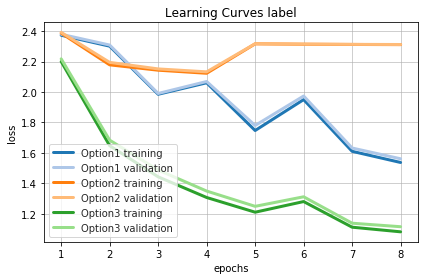

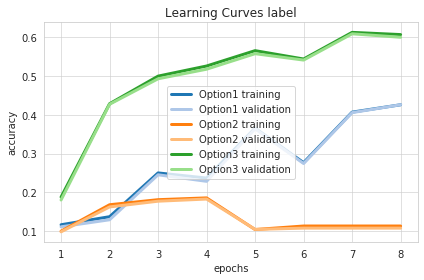

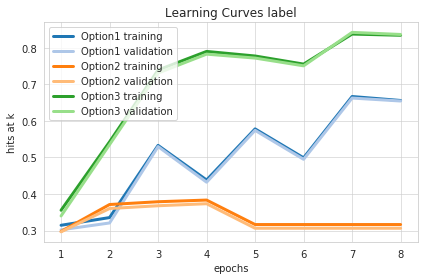

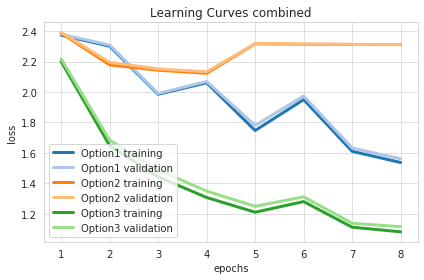

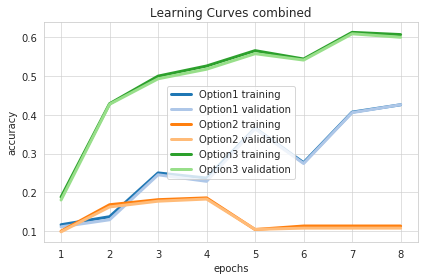

In [25]:
# generating learning curves from training
option_names = [trs.name for trs in list_of_train_stats]
train_stats = [trs.train_stats for trs in list_of_train_stats]
learning_curves(train_stats, 'Survived',
                model_names=option_names,
                output_directory='./visualizations',
                file_format='png')



